# Project : "Mask" or "Without Mask" 

# 1.Setting our DataSet:

In [1]:
images = []
labels = []

In [2]:
import os

In [3]:
# Exporting our DataSet provided:

os.listdir("D:/PROGRAMMING_STUFF/DATASETS/dataset_mask")

['without_mask', 'with_mask']

In [4]:
import cv2

In [5]:
# Refining done on our Dataset:

# Scanning the folders:

for i in ["without_mask", "with_mask"]:
    imageNameList = os.listdir("D:/PROGRAMMING_STUFF/DATASETS/dataset_mask/" + str(i))
    
    # Scanning the Images:
    
    for fileName in imageNameList:
        Image = cv2.imread("D:/PROGRAMMING_STUFF/DATASETS/dataset_mask/" + str(i) + "/" + str(fileName))
        try:
            gray = cv2.cvtColor(Image, cv2.COLOR_BGR2GRAY)
            Image = cv2.resize(gray,(100,100))  # resizing the image to (100,100) dimensions
            images.append(Image)
            
            if i == "without_mask":
                labels.append(0)
            else:
                labels.append(1)
                
        except:
            pass
        
    print("Inside folder ",i)
    
    
# Error Exception Method is used here to avoid program stopping due to Different Image Sizes.

Inside folder  without_mask
Inside folder  with_mask


# Converting All the images to Array form:

In [6]:
import numpy as np

In [7]:
images = np.array(images)
labels = np.array(labels)

# Some imp Refining for our Model:

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_features, test_features, train_targets, test_targets = train_test_split(images, labels, test_size = 0.2)

In [10]:
def preprocessing(img):
    img = img/255
    return img

# Defining our Training & Testing Features:

*MAP* method is used to save our computation Time.

Instead of using loop for each image and then applying *preprocessing* function, we will use this *MAP* method.

In [11]:
train_features = np.array(list(map(preprocessing, train_features)))

In [12]:
train_features.shape

(3614, 100, 100)

In [13]:
# Reshaping is to be done to add Color channels

train_features = train_features.reshape(train_features.shape[0], train_features.shape[1], train_features.shape[2], 1)

In [14]:
train_features.shape

(3614, 100, 100, 1)

In [15]:
test_features.shape

(904, 100, 100)

In [16]:
test_features=test_features.reshape(test_features.shape[0],test_features.shape[1],test_features.shape[2],1)

In [17]:
test_features.shape

(904, 100, 100, 1)

# Applying Image Augmentation over our dataset: 

---- For Better Convolution NN ----

In [18]:
from keras.preprocessing.image import ImageDataGenerator

In [19]:
dataGenerator = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, zoom_range = 0.2, shear_range = 0.1, rotation_range = 10)

In [20]:
# Now applyig these changes to our training Features

dataGenerator.fit(train_features)

In [21]:
## Something about BATCHES is to be written ##

In [22]:
batches = dataGenerator.flow(train_features, train_targets, batch_size = 20)

In [23]:
x_batch, y_batch = next(batches)

# Displaying Images:

In [24]:
import matplotlib.pyplot as plt

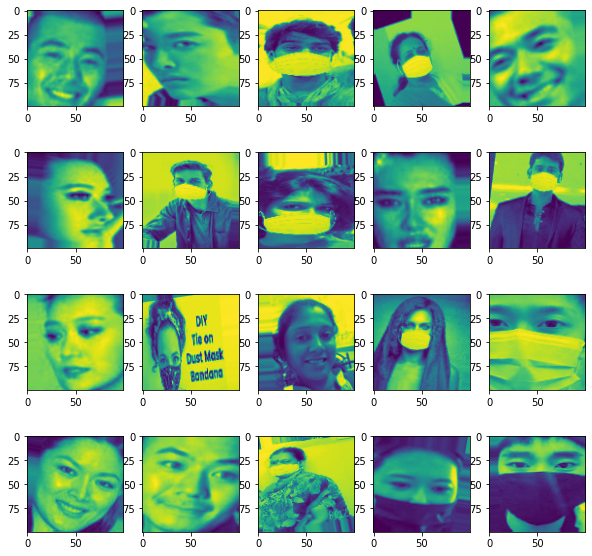

In [25]:
plt.figure(figsize=(10,10))

for i in range (20):
    plt.subplot(4, 5, i+1)
    plt.imshow(x_batch[i].reshape(100,100))
    
plt.show()

# Now, we will Build Our Model:

Step_1 : INCREASING THE NUMBER OF TARGET COLUMNS....

In [26]:
train_targets.shape

(3614,)

In [27]:
from tensorflow.keras.utils import to_categorical

In [28]:
# Applyig ONE HOT ENCODING to our training targets and Testing targets

train_targets = to_categorical(train_targets)

test_targets  = to_categorical(test_targets)

In [29]:
train_targets.shape

(3614, 2)

In [30]:
test_targets.shape

(904, 2)

ONE HOT ENCODING ----- successfully applied

In [31]:
from keras.models import Sequential
from keras.layers import Flatten, Conv2D, MaxPooling2D, Dense, Dropout

# Step_1: Specifying the Architecture:

In [32]:
model = Sequential()

model.add(Conv2D(80,(5,5), activation="relu", input_shape=(100,100,1)))
model.add(Conv2D(80,(5,5), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(80,(5,5), activation="relu"))
model.add(Conv2D(50,(5,5), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation="relu"))
model.add(Dense(2, activation="softmax"))

# Step_2: Compile the Model:

In [33]:
from tensorflow.keras.optimizers import Adam

In [34]:
model.compile(Adam(lr=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

C:\Users\akshi\anaconda3\envs\tf2.4\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# Step_3: Fit the Model:

In [35]:
train_features.shape

(3614, 100, 100, 1)

In [36]:
train_targets.shape

(3614, 2)

In [37]:
model.fit_generator(dataGenerator.flow(train_features, train_targets, batch_size=20), epochs=200)

C:\Users\akshi\AppData\Local\Temp/ipykernel_14828/3369929929.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(dataGenerator.flow(train_features, train_targets, batch_size=20), epochs=200)


Epoch 1/200
181/181 [==============================] - 16s 50ms/step - loss: 0.6736 - accuracy: 0.5797
Epoch 2/200
181/181 [==============================] - 8s 46ms/step - loss: 0.6319 - accuracy: 0.6079
Epoch 3/200
181/181 [==============================] - 8s 46ms/step - loss: 0.5663 - accuracy: 0.6846
Epoch 4/200
181/181 [==============================] - 8s 46ms/step - loss: 0.4647 - accuracy: 0.7695
Epoch 5/200
181/181 [==============================] - 8s 46ms/step - loss: 0.3723 - accuracy: 0.8318
Epoch 6/200
181/181 [==============================] - 8s 46ms/step - loss: 0.3102 - accuracy: 0.8586
Epoch 7/200
181/181 [==============================] - 8s 47ms/step - loss: 0.2849 - accuracy: 0.8854
Epoch 8/200
181/181 [==============================] - 8s 46ms/step - loss: 0.2584 - accuracy: 0.8960
Epoch 9/200
181/181 [==============================] - 8s 47ms/step - loss: 0.2356 - accuracy: 0.9020
Epoch 10/200
181/181 [==============================] - 8s 47ms/step - loss: 0.22

181/181 [==============================] - 9s 48ms/step - loss: 0.0445 - accuracy: 0.9840
Epoch 76/200
181/181 [==============================] - 9s 47ms/step - loss: 0.0642 - accuracy: 0.9798 0s - loss: 0.0621 - accura
Epoch 77/200
181/181 [==============================] - 9s 48ms/step - loss: 0.0497 - accuracy: 0.9820
Epoch 78/200
181/181 [==============================] - 9s 47ms/step - loss: 0.0439 - accuracy: 0.9853
Epoch 79/200
181/181 [==============================] - 9s 47ms/step - loss: 0.0313 - accuracy: 0.9889
Epoch 80/200
181/181 [==============================] - 9s 47ms/step - loss: 0.0503 - accuracy: 0.9834 4s - loss: 0.0397 - accu
Epoch 81/200
181/181 [==============================] - 9s 47ms/step - loss: 0.0425 - accuracy: 0.9873
Epoch 82/200
181/181 [==============================] - 9s 47ms/step - loss: 0.0808 - accuracy: 0.9721 0s - loss: 0.0806 - accuracy: 0.
Epoch 83/200
181/181 [==============================] - 9s 47ms/step - loss: 0.0548 - accuracy: 0.9776 0

181/181 [==============================] - 9s 47ms/step - loss: 0.0226 - accuracy: 0.9923 0s - loss: 0.0219 - accura
Epoch 147/200
181/181 [==============================] - 9s 47ms/step - loss: 0.0318 - accuracy: 0.9909
Epoch 148/200
181/181 [==============================] - 9s 47ms/step - loss: 0.0293 - accuracy: 0.9914
Epoch 149/200
181/181 [==============================] - 9s 47ms/step - loss: 0.0394 - accuracy: 0.9862
Epoch 150/200
181/181 [==============================] - 9s 47ms/step - loss: 0.0466 - accuracy: 0.9851
Epoch 151/200
181/181 [==============================] - 9s 47ms/step - loss: 0.0336 - accuracy: 0.9892
Epoch 152/200
181/181 [==============================] - 9s 47ms/step - loss: 0.0404 - accuracy: 0.9884 0s - loss: 0.0363 - 
Epoch 153/200
181/181 [==============================] - 9s 47ms/step - loss: 0.0266 - accuracy: 0.9914
Epoch 154/200
181/181 [==============================] - 9s 47ms/step - loss: 0.0425 - accuracy: 0.9859
Epoch 155/200
181/181 [=======

def getClassName(classNo):
    if   classNo == '0': return 'without_mask'
    elif classNo == '1': return 'with_mask' 

--- For the purpose of Testing Our Model --- 

In [ ]:
# Load the Cascade
face_cascade = cv2.CascadeClassifier("D:/PROGRAMMING_STUFF/HaarCascade/haarcascade_frontalface_default.xml")

# Read The input Image (array)
img = cv2.imread("D:/PROGRAMMING_STUFF/Lenna.png")

# Converting into GrayScale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect Faces 
faces = face_cascade.detectMultiScale(gray, 1.1, 5)

# Drawing Rectangles over the faces:
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x,y),(x+w,y+h), (0,255,0), 2)
    face_img = gray[y:y+h, x:x+h]  # Cropping the faces
    
# Displaying the Output:
cv2.imshow('Detections', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
face_img.shape

In [ ]:
labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}

In [ ]:
video = cv2.VideoCapture(0)

In [ ]:
while(True):

    ret,img=video.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(img,1.3,5)  

    for (x,y,w,h) in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result = model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
        
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):  # ESC key
        break
        
cv2.destroyAllWindows()
video.release()

In [ ]:
result